## Lecture 10 Example

**Two-Way ANOVA: analysis of completely randomised blocked design experiments**

Quick recap:

$$
\begin{align}
\text{One-way model:}&\quad & y_{ij} &= \mu + \alpha_i + \epsilon_{ij} \\
\text{Additive Two-way model:}&\quad & y_{ijk} &= \mu + \alpha_i + \beta_j + \epsilon_{ijk} \\
\text{Interacting Two-way model:}&\quad & y_{ijk} &= \mu + \alpha_i + \beta_j + \gamma_{ij} + \epsilon_{ijk}
\end{align}
$$

---

A tyre manufacturer wishes to investigate the rate of wear (in mm) on their products and whether this rate differs substantially among the four possible positions that the tyre can occupy on a car:

- ``Pos1`` - front left tyre
- ``Pos2`` - front right tyre
- ``Pos3`` - rear left tyre
- ``Pos4`` - rear right tyre

The tyre manufacturer is also interested in the average effects on wear of

- front versus rear tyres
- left versus right tyres

The experimental data is given in [tyres.csv](https://raw.githubusercontent.com/uqglmn/sm/main/anova/tyres.csv). Three different cars, ``A``, ``B``, and ``C``, were used in tyre wear trials.


---

**1.1.** Read and visually inspect the data.

In [1]:
tyres = read.csv("https://raw.githubusercontent.com/uqglmn/sm/main/anova/tyres.csv")
tyres$Car = as.factor(tyres$Car)  # categorical variable
str(tyres)

'data.frame':	9 obs. of  5 variables:
 $ Car : Factor w/ 3 levels "A","B","C": 1 1 1 2 2 2 3 3 3
 $ Pos1: num  20.9 19 20.3 17.1 15.9 ...
 $ Pos2: num  18.3 21.2 19.4 14.8 11.3 ...
 $ Pos3: num  28.5 28 30.1 37.2 38.9 ...
 $ Pos4: num  20.2 18.8 19.2 34.3 34.7 ...


In [2]:
# data information
a = 4              # the number of groups  
b = 3              # the number of blocks
n = nrow(tyres)/b  # the number of trials per cell (per group per block)
N = a*b*n          # the total number of trials

DataFrame ``tyres`` is not of the form we need for anova analysis:

In [3]:
tyres

Car,Pos1,Pos2,Pos3,Pos4
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
A,20.935,18.279,28.535,20.182
A,19.013,21.200,27.998,18.792
A,20.332,19.389,30.073,19.203
B,17.123,14.815,37.227,34.340
B,15.919,11.280,38.853,34.707
B,15.285,12.153,40.017,36.307
C,29.590,19.973,30.529,29.023
C,28.092,20.096,29.177,28.176
C,28.304,20.477,30.795,28.701


We will restructe the DataFrame ``tyres`` so that each column would be a different variable:

In [4]:
# restructure data
df = cbind(stack(tyres[,2:5]), rep(tyres[,1],a))
colnames(df) = c("wear","position","car")
str(df)

'data.frame':	36 obs. of  3 variables:
 $ wear    : num  20.9 19 20.3 17.1 15.9 ...
 $ position: Factor w/ 4 levels "Pos1","Pos2",..: 1 1 1 1 1 1 1 1 1 2 ...
 $ car     : Factor w/ 3 levels "A","B","C": 1 1 1 2 2 2 3 3 3 1 ...


DataFrame ``df`` has the correct structure:

- the first column is the response variable ``wear``
- the second column is the main predictor ``position``
- the third columns is the secondary predictor ``car``

In [5]:
df

wear,position,car
<dbl>,<fct>,<fct>
20.935,Pos1,A
19.013,Pos1,A
20.332,Pos1,A
17.123,Pos1,B
15.919,Pos1,B
15.285,Pos1,B
29.590,Pos1,C
28.092,Pos1,C
28.304,Pos1,C


We can now draw a box plot to inspect group and block means:

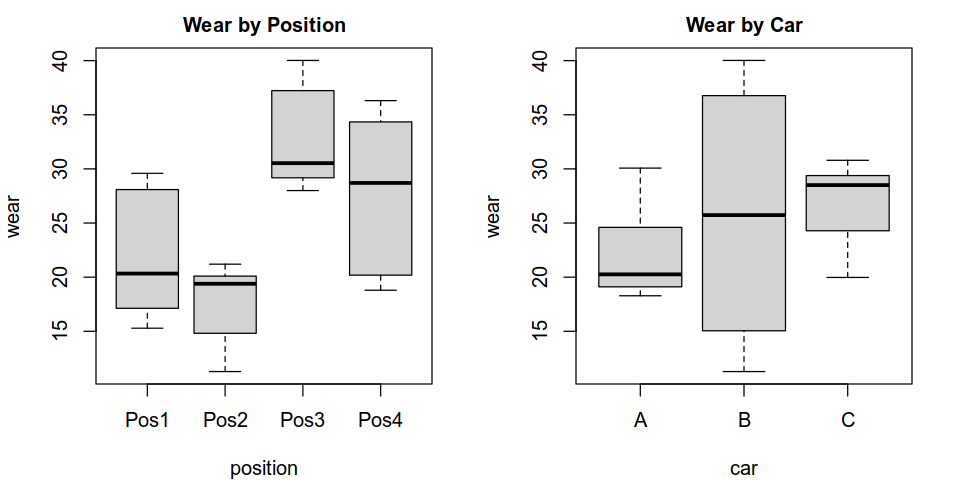

In [6]:
options(repr.plot.width=8, repr.plot.height=4)
par(mar=c(4,4,2,2), mfrow=c(1,2))

boxplot(wear~position, main="Wear by Position", cex.main = 1, data=df)
boxplot(wear~car, main="Wear by Car", cex.main = 1, data=df)

There is a clear difference in the mean wear between front and rear tyres, but not so obvious between left and right tyres. Moreover, the differences may be due to a chance alone.

---

**1.2.** **(Revision)** Carry out a one-way ANOVA to test the hypothesis, with a 95% confidence level, that all positions have the same effect on the tyre wear, that is

$$
H_0 : \alpha_1 = \alpha_2 = \alpha_3 = \alpha_4 = 0 \quad\text{vs.}\quad H_1 : \text{ at least one } \alpha_i \ne 0
$$

You need to construct an analysis of variance table and compute the test statistic. You need to use the formulas below:

$$
SS_T = \sum_{i=1}^a \sum_{j=1}^{n_i} y_{ij}^2 - N \bar y_{\bullet\bullet}^2 \qquad
SS_B = \sum_{i=1}^a n_i \bar y_{i \bullet}^2 - N \bar y_{\bullet\bullet}^2 \qquad
SS_E = SS_T - SS_B
$$

and 

$$
MS_B = \frac{SS_B}{a-1} \qquad
MS_E = \frac{SS_E}{N-a} \qquad
F = \frac{MS_B}{MS_E}
$$

where $a$ is the number of treatment groups and $N = \sum_{i=1}^{a} a n_i$ is the total number of observations (trials).

In [7]:
SST = sum(df$wear^2) - N*mean(df$wear)^2
SSB = b*n*sum( tapply(df$wear,df$position,mean)^2 ) - N*mean(df$wear)^2
SSE = SST-SSB

MSB = SSB/(a-1)
MSE = SSE/(N-a)

F = MSB/MSE
P = 1-pf(F,a-1,N-a)

In [8]:
table = data.frame(row.names=c("Between groups", "Residual", "Total"), 
                   dof=c(a-1,N-a,N-1),
                   SS=c(SSB,SSE,SST),
                   MS=c(MSB,MSE,NA),
                   F=c(F,NA,NA),
                   P=c(P,NA,NA)
                  )
round(table, 3)

,dof,SS,MS,F,P
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Between groups,3,1189.014,396.338,13.739,0
Residual,32,923.119,28.847,NA,NA
Total,35,2112.132,NA,NA,NA


We now repeat the same analysis using built-in statistical functions.

In [9]:
model.1way = aov(wear~position,data=df)
round(anova(model.1way), 3)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
position,3,1189.014,396.338,13.739,0
Residuals,32,923.119,28.847,NA,NA


**Conclusions.** The calculated P-value is $P_{cal} \approx 0$, thus we reject the null hypothesis that all positions have the same effect on the tyre wear.

---

**1.3.** **(Revision)** Conduct residual analysis. Comment on the plots.

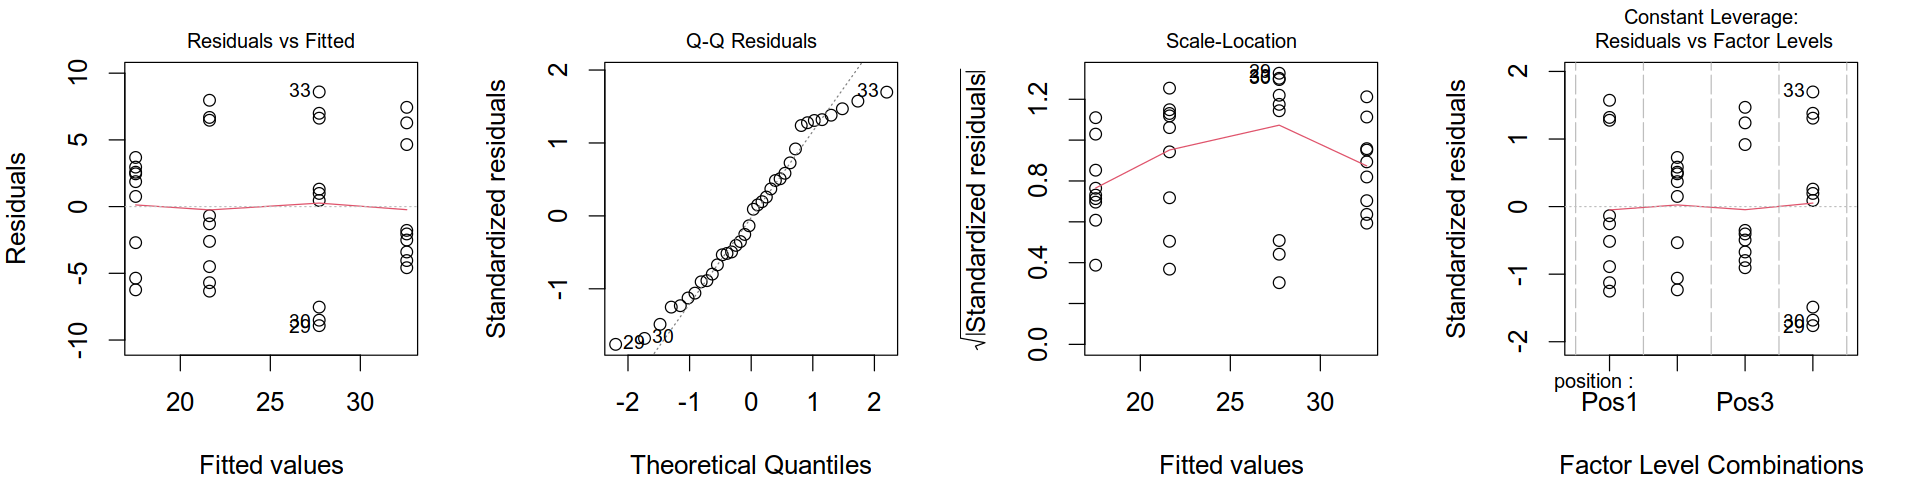

In [10]:
options(repr.plot.width=16, repr.plot.height=4)
par(mfrow=c(1,4), mar=c(4,4,2,2), cex=1.3)
plot(model.1way)

In [11]:
# Test the hypothesis that sigma1 = sigma2 = sigma3 = sigma4 = sigma
library(car) 
round(leveneTest(wear~position, data=df),3)

Loading required package: carData



,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>
group,3,0.865,0.469
,32,NA,NA


*(Comments will be given in class)*

---

**1.4.** **(Revision)** Construct linear orthogonal single degree of freedom contrasts to compare the average effects on wear of

- front versus rear tyres
- left versus right tyres

and carry out the corresponding significance tests with a 95% confidence level. Recall that two linear contrasts $l_1 = (l_{11}, \ldots, l_{1a})$ and $l_2=(l_{21}, \ldots, l_{2a})$ are orhtogonal if

$$
\sum_{i=1}^a n_i l_{1i} l_{2i} = 0
$$

The corresppning sums of squares and the $F$-statistics are computed using

$$
z_w = \sum_{i=1}^a l_{wi} y_{i\bullet} \qquad
D_w = \sum_{i=1}^a n_i l_{wi}^2 \qquad
SS_w = \frac{z_w^2}{D_w} \qquad
F_w = \frac{SS_w}{MS_E} \sim F_{1,N-a} 
$$

In [12]:
# inspect the order of levels of the position variable
# Pos1: front left, Pos2:front right
# Pos3: rear left, Pos4: rear right
levels(df$position)

[1] "Pos1" "Pos2" "Pos3" "Pos4"

In [13]:
l1 = c(1,1,-1,-1) # front vs rear, FR
l2 = c(1,-1,1,-1) # left vs right, LR
l3 = c(1,-1,-1,1) # cross contrast, X

c( l1 %*% l2, l1 %*% l3, l2 %*% l3)

[1] 0 0 0

In [14]:
# compute sums of wear partitioned by position
groupsums = tapply(df$wear, df$position, sum)
groupsums

Pos1    Pos2    Pos3    Pos4 
194.593 157.662 293.204 249.431

In [15]:
z1 = sum( l1*groupsums )
z2 = sum( l2*groupsums )
z3 = sum( l3*groupsums )

D1 = b*n*sum( l1^2 )
D2 = b*n*sum( l2^2 )
D3 = b*n*sum( l3^2 )

SS1 = (z1^2/D1)
SS2 = (z2^2/D2)
SS3 = (z3^2/D3)

In [16]:
F1 = SS1/MSE
F2 = SS2/MSE
F3 = SS3/MSE

P1 = 1-pf(F1,1,N-a)
P2 = 1-pf(F2,1,N-a)
P3 = 1-pf(F3,1,N-a)

In [17]:
table = data.frame(row.names=c("Between groups",
                               "Front vs Rear","Left vs Right","Cross effect",
                               "Residual","Total"),
                   dof=c(a-1,1,1,1,N-a,N-1),
                   SS=c(SSB,SS1,SS2,SS3,SSE,SST),
                   MS=c(MSB,SS1,SS2,SS3,MSE,NA),
                   F=c(F,F1,F2,F3,NA,NA),
                   P=c(P,P1,P2,P3,NA,NA)
                  )
round(table, 4)

,dof,SS,MS,F,P
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Between groups,3,1189.0137,396.3379,13.7391,0.0000
Front vs Rear,1,1006.7929,1006.7929,34.9006,0.0000
Left vs Right,1,180.9204,180.9204,6.2716,0.0176
Cross effect,1,1.3004,1.3004,0.0451,0.8332
Residual,32,923.1185,28.8475,NA,NA
Total,35,2112.1322,NA,NA,NA


We now repeat the same analysis using built-in statistical functions.

In [18]:
contrasts(df$position) = cbind(l1,l2,l3)
clist = c("front vs rear"=1, "left vs right"=2, "cross contrast"=3)

In [19]:
model.1way = aov(wear~position, data=df)
summary(model.1way, split=list(position=clist))

                           Df Sum Sq Mean Sq F value   Pr(>F)    
position                    3 1189.0   396.3  13.739 6.28e-06 ***
  position: front vs rear   1 1006.8  1006.8  34.901 1.42e-06 ***
  position: left vs right   1  180.9   180.9   6.272   0.0176 *  
  position: cross contrast  1    1.3     1.3   0.045   0.8332    
Residuals                  32  923.1    28.8                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

**Conclusions:**

- The "front vs rear" contrast is highly significant
- The "left vs right" constrast is significant
- The "cross" contrast is not significant

---

**1.5.** Carry out a two-way ANOVA to test the hypothesis, with a 95% confidence level, that all positions (A factor) and all cars (B factor) have the same effect on the tyre wear, that is

$$
H^A_0 : \alpha_1 = \alpha_2 = \alpha_3 = \alpha_4 = 0 \quad\text{vs.}\quad H^A_1 : \text{ at least one } \alpha_i \ne 0
$$

and 

$$
H^B_0 : \beta_1 = \beta_2 = \beta_3 = 0 \quad\text{vs.}\quad H^B_1 : \text{ at least one } \beta_j \ne 0
$$


You need to construct an analysis of variance table and compute the test statistic. You need to use the formulas below:

$$
SS_T = \sum_{i=1}^{a} \sum_{j=1}^{b} \sum_{k=1}^n y_{ijk}^2 - N \bar{y}^2_{\bullet\bullet\bullet} \qquad
SS_A = bn \sum_{i=1}^{a} \bar{y}_{i\bullet\bullet}^2 - N \bar{y}^2_{\bullet\bullet\bullet} \qquad
SS_B = an \sum_{j=1}^{b} \bar{y}_{\bullet j\bullet}^2 - N \bar{y}^2_{\bullet\bullet\bullet} \qquad
SS_E= SS_T - SS_A - SS_B
$$

$$
MS_A = \frac{SS_A}{a-1} \qquad 
MS_B = \frac{SS_B}{b-1} \qquad 
MS_E=\frac{SS_E}{N-a-b+1} 
$$

and 

$$
F_A =\frac{MS_A}{MS_E} \sim F_{a-1, N-a-b+1} \qquad
F_B =\frac{MS_B}{MS_E} \sim F_{b-1, N-a-b+1} 
$$

where $a$ is the number of treatment groups, $b$ is the number of blocks, $n$ is the number of cases per each each group and block, and $N = a b n$ is the total number of observations.


In [20]:
GMSq = mean(df$wear)^2

SST = sum(df$wear^2) - N*GMSq
SSA = b*n*sum( tapply(df$wear,df$position,mean)^2 ) - N*GMSq
SSB = a*n*sum( tapply(df$wear,df$car,mean)^2  ) - N*GMSq
SSE = SST-SSA-SSB

MSA = SSA/(a-1)
MSB = SSB/(b-1)
MSE = SSE/(N-a-b+1)

FA=MSA/MSE
FB=MSB/MSE

PA=1-pf(FA,a-1,N-a-b+1)
PB=1-pf(FB,b-1,N-a-b+1)

In [21]:
table = data.frame(row.names=c("Between groups", "Between blocks", "Residual", "Total"), 
                   dof=c(a-1,b-1,N-a-b+1,N-1),
                   SS=c(SSA,SSB,SSE,SST),
                   MS=c(MSA,MSB,MSE,NA),
                   F=c(FA,FB,NA,NA),
                   P=c(PA,PB,NA,NA)
                  )
round(table, 3)

,dof,SS,MS,F,P
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Between groups,3,1189.014,396.338,15.518,0.000
Between blocks,2,156.884,78.442,3.071,0.061
Residual,30,766.235,25.541,NA,NA
Total,35,2112.132,NA,NA,NA


We now repeat the same analysis using built-in statistical functions.

In [22]:
model.2way = aov(wear~position+car,data=df)
round(anova(model.2way), 3)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
position,3,1189.014,396.338,15.518,0.000
car,2,156.884,78.442,3.071,0.061
Residuals,30,766.235,25.541,NA,NA


**Conclusions:** 
- The calculated P-value for group effects is $P_{cal} \approx 0$, thus we reject the null hypothesis that all positions have the same effect on the tyre wear.
- The calculated P-value for block effects is $P_{cal} = 6\%$, thus we accept the null hypothesis that all cars have the same effect on the tyre wear.

**Remark.** We will see below that the two-way model with an interaction fits the data better and the calculated P-value for block effects will be different. ($P_{cal} = 6\%$ is at the threshold thus we have to be carefull in making the decision.)

---

**1.6.** Conduct residual analysis. Comment on the plots.

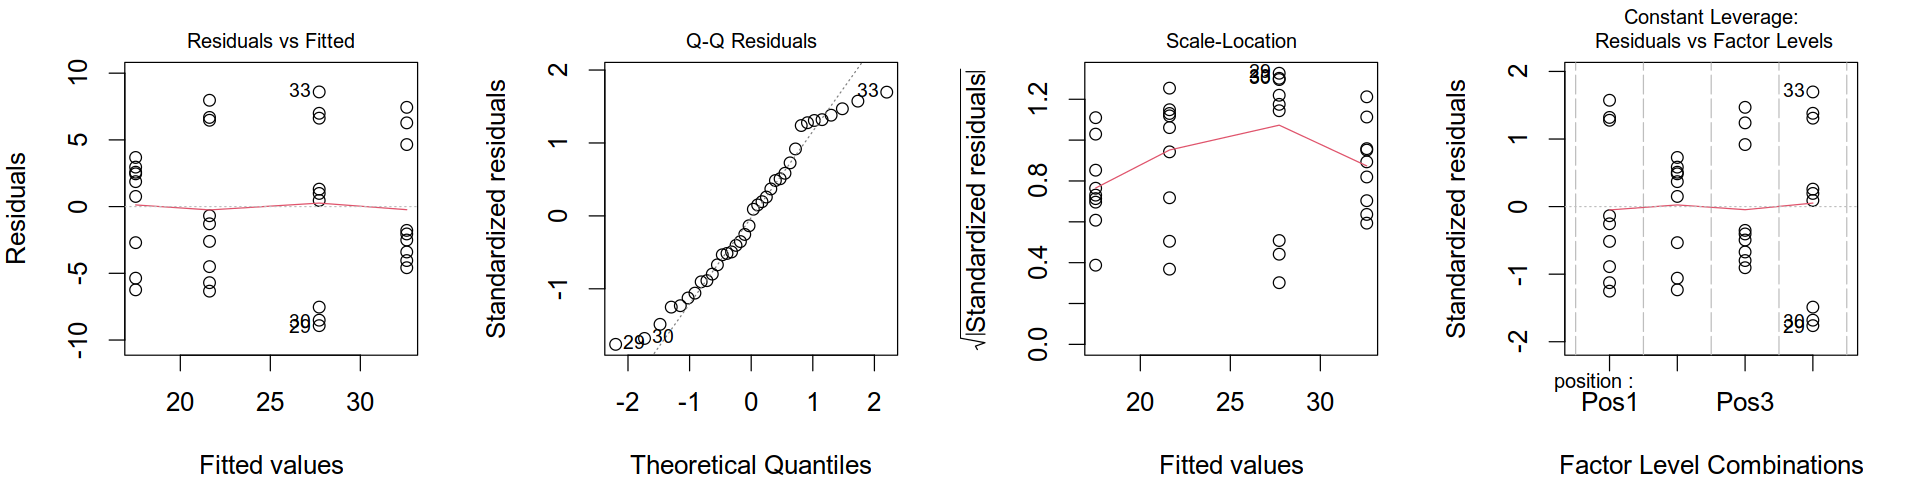

In [23]:
options(repr.plot.width=16, repr.plot.height=4)
par(mfrow=c(1,4), mar=c(4,4,2,2), cex=1.3)
plot(model.1way)

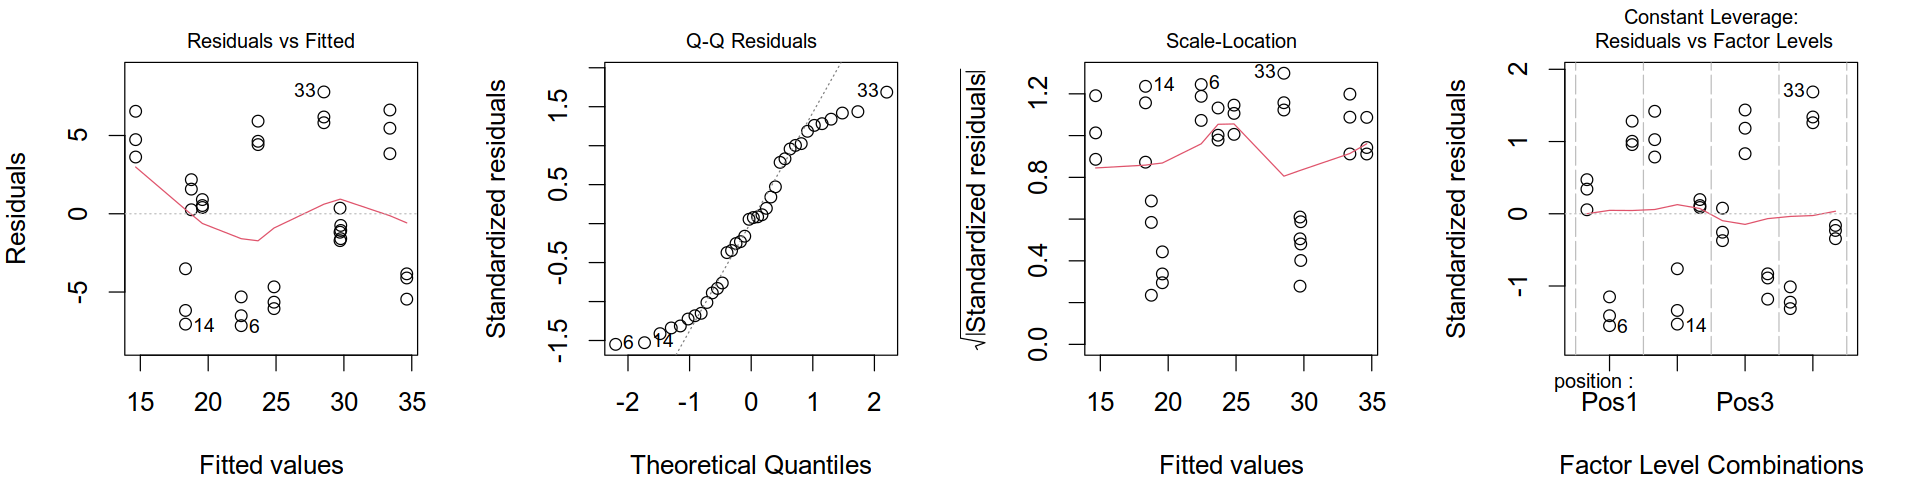

In [24]:
options(repr.plot.width=16, repr.plot.height=4)
par(mfrow=c(1,4), mar=c(4,4,2,2), cex=1.3)
plot(model.2way)

*(Comments will be given in class)*

---

**1.7.** Carry out a two-way ANOVA with an interaction to test the hypothesis, with a 95% confidence level, that all positions (A factor) and all cars (B factor) have the same effect on the tyre wear, and test the presence of an interaction, that is

$$
H^A_0 : \alpha_1 = \alpha_2 = \alpha_3 = \alpha_4 = 0 \quad\text{vs.}\quad H^A_1 : \text{ at least one } \alpha_i \ne 0
$$

and 

$$
H^B_0 : \beta_1 = \beta_2 = \beta_3 = 0 \quad\text{vs.}\quad H^B_1 : \text{ at least one } \beta_j \ne 0
$$

and 

$$
H^{AB}_0 : \text{ all } \gamma_{ij} = 0 \quad\text{vs.}\quad H^{AB}_1 : \text{ at least one } \gamma_{ij} \ne 0
$$


You need to construct an analysis of variance table and compute the test statistic. You need to use the formulas below:

$$
SS_T = \sum_{i=1}^{a} \sum_{j=1}^{b} \sum_{k=1}^n y_{ijk}^2 - N \bar{y}^2_{\bullet\bullet\bullet} \qquad
SS_A = bn \sum_{i=1}^{a} \bar{y}_{i\bullet\bullet}^2 - N \bar{y}^2_{\bullet\bullet\bullet} \qquad
SS_B = an \sum_{j=1}^{b} \bar{y}_{\bullet j\bullet}^2 - N \bar{y}^2_{\bullet\bullet\bullet} 
$$

$$
SS_E = \sum_{i=1}^a \sum_{j=1}^b \sum_{k=1}^n y_{ijk}^2 - n \sum_{i=1}^a \sum_{j=1}^b  \bar y_{ij\bullet}^2 \qquad
SS_{AB} = SS_T - SS_A - SS_B - SS_E
$$


$$
MS_A = \frac{SS_A}{a-1} \qquad 
MS_B = \frac{SS_B}{b-1} \qquad 
MS_{AB} = \frac{SS_{AB}}{(a-1)(b-1)} \qquad
MS_E=\frac{SS_E}{N-ab} 
$$

and 

$$
F_A =\frac{MS_A}{MS_E} \sim F_{a-1, N-ab} \qquad
F_B =\frac{MS_B}{MS_E} \sim F_{b-1, N-ab} \qquad
F_{AB} =\frac{MS_B}{MS_E} \sim F_{(a-1)(b-1), N-ab} 
$$

where $a$ is the number of treatment groups, $b$ is the number of blocks, $n$ is the number of cases per each each group and block, and $N = a b n$ is the total number of observations.


The interaction plot (the plot of cell means by position by car):

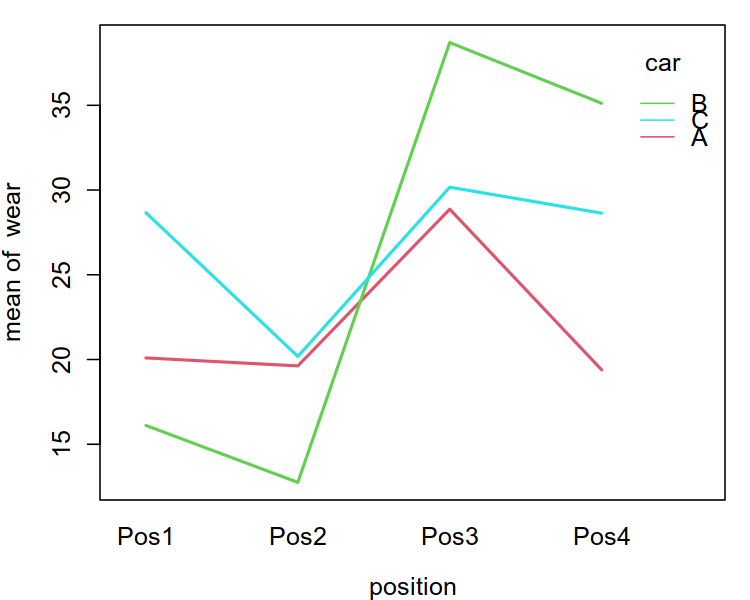

In [25]:
# interaction plot
options(repr.plot.width=5, repr.plot.height=4, repr.plot.res = 150, repr.plot.pointsize=10)
par(mar=c(4,4,1,1))
with(df, interaction.plot(position, car, wear, lty=1, lwd=2, col=c(2,3,5)))

The interaction plot indicates that interactions may be significant.

In [26]:
GMSq = mean(df$wear)^2

SST  = sum(df$wear^2) - N*GMSq
SSA  = b*n*sum( tapply(df$wear,df$position,mean)^2 ) - N*GMSq
SSB  = a*n*sum( tapply(df$wear,df$car,mean)^2 ) - N*GMSq
SSE  = sum(df$wear^2) - n*sum( tapply(df$wear, list(df$position, df$car), mean)^2 )
SSAB = SST - SSA - SSB - SSE

MSA  = SSA/(a-1)
MSB  = SSB/(b-1)
MSAB = SSAB/((a-1)*(b-1))
MSE  = SSE/(N-a*b)

FA  = MSA/MSE
FB  = MSB/MSE
FAB = MSAB/MSE

PA  = 1-pf(FA,a-1,N-a*b)
PB  = 1-pf(FB,b-1,N-a*b)
PAB = 1-pf(FAB,(a-1)*(b-1),N-a*b)

In [27]:
table = data.frame(row.names=c("Between groups", "Between blocks", "Interaction", "Residual", "Total"), 
                   dof=c(a-1,b-1,(a-1)*(b-1),N-a*b,N-1),
                   SS=c(SSA,SSB,SSAB,SSE,SST),
                   MS=c(MSA,MSB,MSAB,MSE,NA),
                   F=c(FA,FB,FAB,NA,NA),
                   P=c(PA,PB,PAB,NA,NA)
                  )
round(table, 3)

,dof,SS,MS,F,P
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Between groups,3,1189.014,396.338,344.842,0
Between blocks,2,156.884,78.442,68.250,0
Interaction,6,738.651,123.108,107.113,0
Residual,24,27.584,1.149,NA,NA
Total,35,2112.132,NA,NA,NA


We now repeat the same analysis using built-in statistical functions.

In [28]:
model.2way.int = aov(wear~position*car,data=df)
round(anova(model.2way.int), 3)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
position,3,1189.014,396.338,344.842,0
car,2,156.884,78.442,68.250,0
position:car,6,738.651,123.108,107.113,0
Residuals,24,27.584,1.149,NA,NA


**Conclusions.** The calculated P-values are $P_{cal} \approx 0$ for both tests, thus we reject the null hypotheses that all positions and all cars have the same effect on the tyre wear.

---

**1.8.** Conduct residual analysis. Comment on the plots.

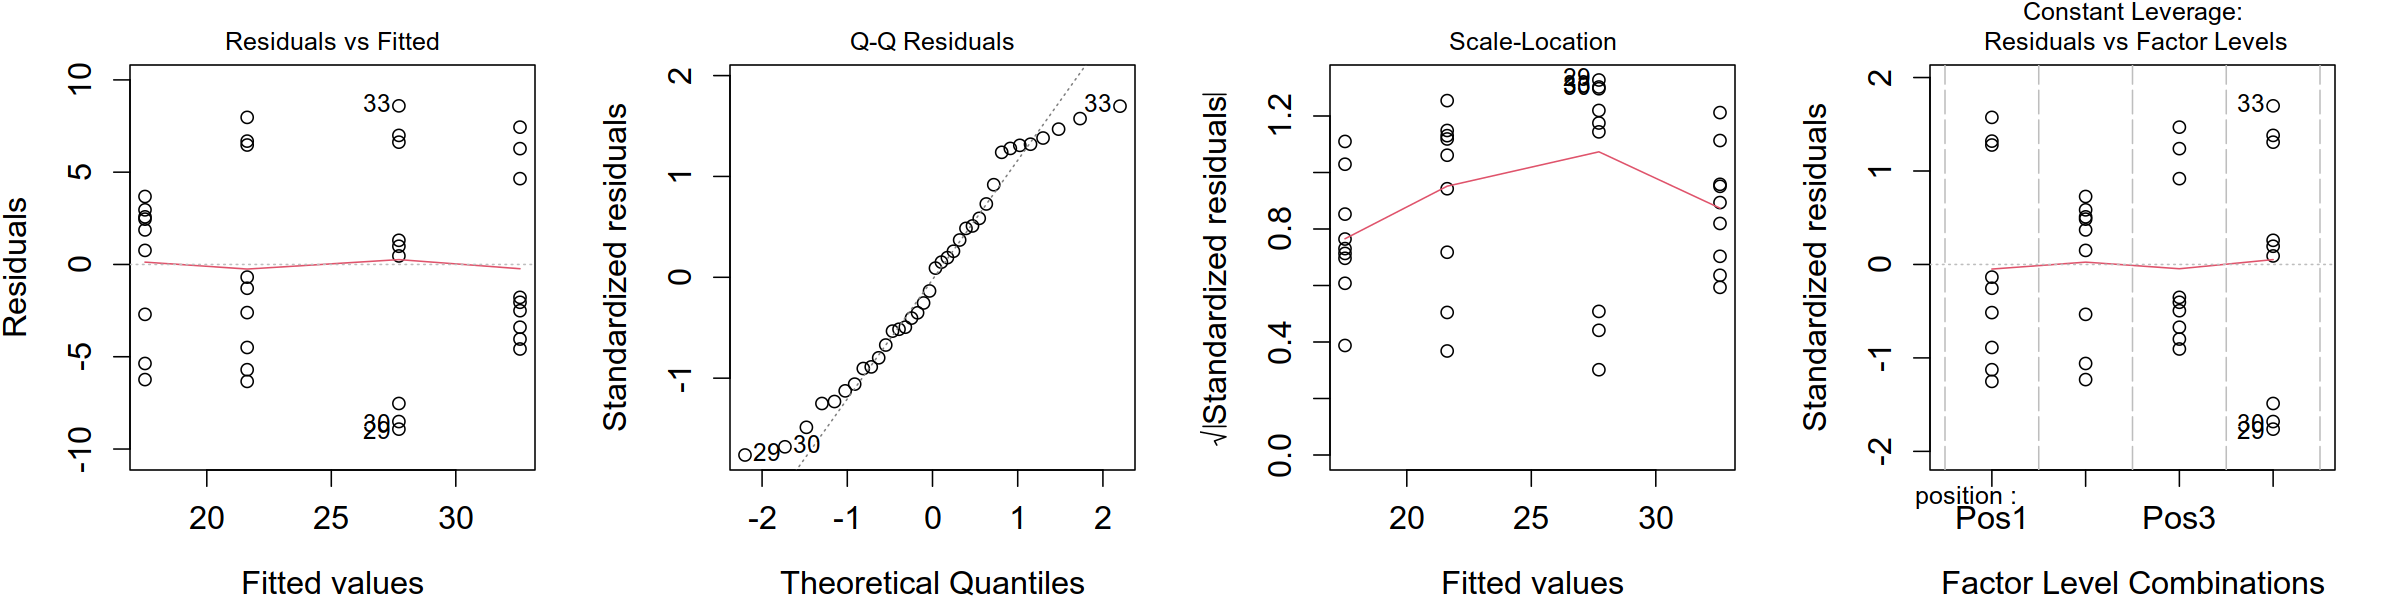

In [29]:
options(repr.plot.width=16, repr.plot.height=4)
par(mfrow=c(1,4), mar=c(4,4,2,2), cex=1.3)
plot(model.1way)

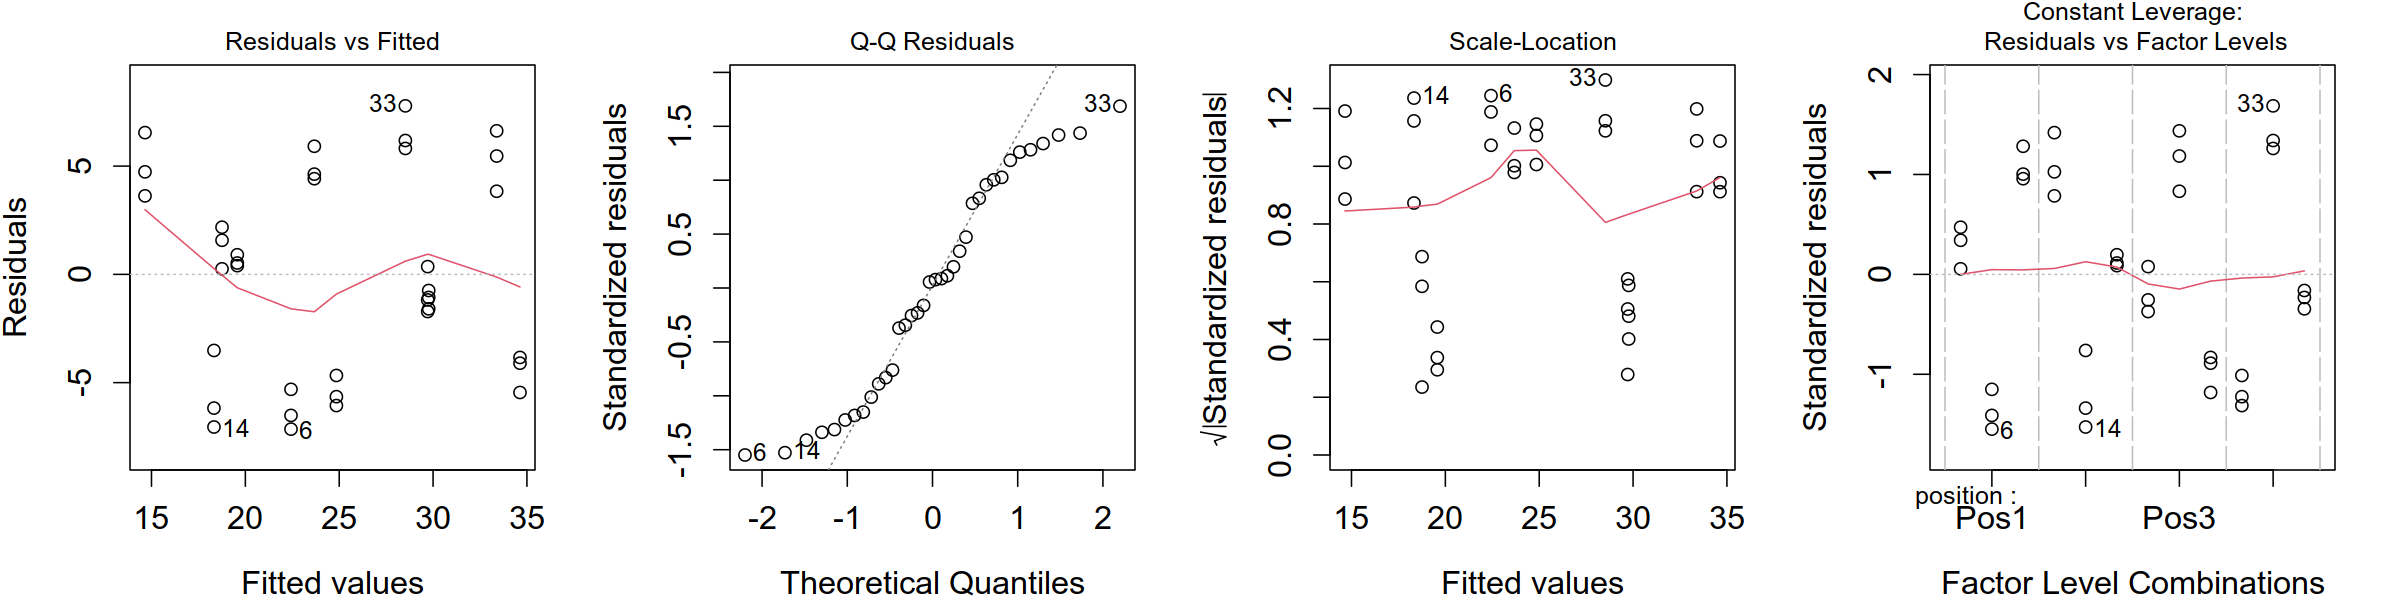

In [30]:
options(repr.plot.width=16, repr.plot.height=4)
par(mfrow=c(1,4), mar=c(4,4,2,2), cex=1.3)
plot(model.2way)

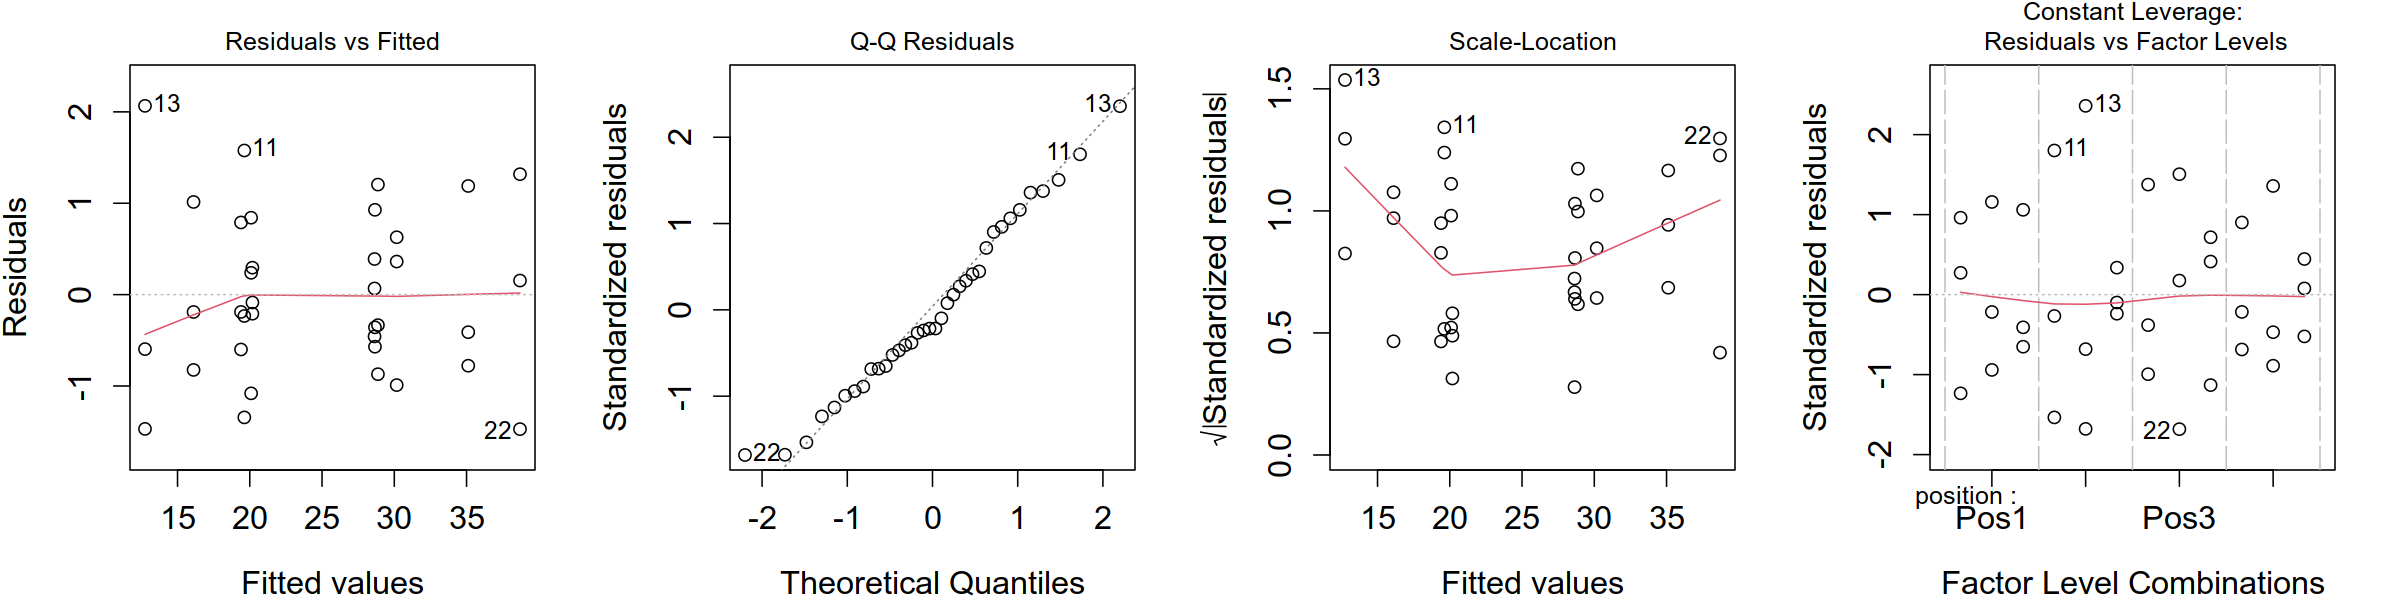

In [31]:
options(repr.plot.width=16, repr.plot.height=4)
par(mfrow=c(1,4), mar=c(4,4,2,2), cex=1.3)
plot(model.2way.int)

*(Comments will be given in class)*

---

**1.9.** Repeat the contrast analysis.

In [32]:
l1 = c(1,1,-1,-1) # front vs rear, FR
l2 = c(1,-1,1,-1) # left vs right, LR
l3 = c(1,-1,-1,1) # cross contrast, X

c( l1 %*% l2, l1 %*% l3, l2 %*% l3)

[1] 0 0 0

In [33]:
contrasts(df$position) = cbind(l1,l2,l3)
clist = c("front vs rear"=1, "left vs right"=2, "cross contrast"=3)

In [34]:
model.1way = aov(wear~position, data=df)
summary(model.1way, split=list(position=clist))

                           Df Sum Sq Mean Sq F value   Pr(>F)    
position                    3 1189.0   396.3  13.739 6.28e-06 ***
  position: front vs rear   1 1006.8  1006.8  34.901 1.42e-06 ***
  position: left vs right   1  180.9   180.9   6.272   0.0176 *  
  position: cross contrast  1    1.3     1.3   0.045   0.8332    
Residuals                  32  923.1    28.8                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [35]:
model.2way = aov(wear~position+car, data=df)
summary(model.2way, split=list(position=clist))

                           Df Sum Sq Mean Sq F value   Pr(>F)    
position                    3 1189.0   396.3  15.518 2.81e-06 ***
  position: front vs rear   1 1006.8  1006.8  39.418 6.42e-07 ***
  position: left vs right   1  180.9   180.9   7.083   0.0124 *  
  position: cross contrast  1    1.3     1.3   0.051   0.8230    
car                         2  156.9    78.4   3.071   0.0612 .  
Residuals                  30  766.2    25.5                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [36]:
model.2way.int = aov(wear~position*car, data=df)
summary(model.2way.int, split=list(position=clist))

                               Df Sum Sq Mean Sq F value   Pr(>F)    
position                        3 1189.0   396.3 344.842  < 2e-16 ***
  position: front vs rear       1 1006.8  1006.8 875.982  < 2e-16 ***
  position: left vs right       1  180.9   180.9 157.414 4.94e-12 ***
  position: cross contrast      1    1.3     1.3   1.131    0.298    
car                             2  156.9    78.4  68.250 1.25e-10 ***
position:car                    6  738.7   123.1 107.113 4.03e-16 ***
  position:car: front vs rear   2  638.3   319.1 277.674  < 2e-16 ***
  position:car: left vs right   2    4.6     2.3   2.010    0.156    
  position:car: cross contrast  2   95.8    47.9  41.655 1.57e-08 ***
Residuals                      24   27.6     1.1                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

**Conclusions:**

- The "front vs rear" contrast is highly significant
- The "left vs right" constrast is highly significant
- The "cross" contrast is not significant

---